In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import pyarrow

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# Plot aesthetics
color_pal = sns.color_palette()
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
import scipy.sparse.linalg


In [2]:
import pandas as pd

# Assuming you have already loaded the DataFrame df from the specified filepath
filepath = 'sample-data/term_dates_parking.csv'
df = pd.read_csv(filepath)

# Rename 'PARKING_LOT_TO_PREDICT' column to your chosen word
chosen_word = 'North'  # Replace 'YourChosenWord' with your desired word
df = df.rename(columns={'PARKING_LOT_TO_PREDICT': chosen_word})

# Extract 'Timestamp' and the renamed column into a new DataFrame
columns_to_keep = ['Timestamp', chosen_word]
df = df[columns_to_keep]

# Display the tail of the new DataFrame
df.tail()

,Timestamp,North
37905,2024-03-05 19:00:00,72
37906,2024-03-05 20:00:00,10
37907,2024-03-05 21:00:00,0
37908,2024-03-05 22:00:00,1
37909,2024-03-05 23:00:00,0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import scipy.sparse.linalg
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming df_subset contains 'Timestamp' and 'chosen_word' columns

# Step 1: Prepare data
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Step 2: Feature Engineering
# Example: Extracting month and day of the week as features
df['date'] = df.index
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.dayofyear
df['week_of_year'] = df['date'].dt.isocalendar().week
df['day_of_week'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour  # Add hour feature


df['year'] = df['date'].dt.year
df['is_month_start'] = df['date'].dt.is_month_start.astype(int)
df['is_month_end'] = df['date'].dt.is_month_end.astype(int)
    
    # Seasonality features
df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)
df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)
df['sin_day'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)
df['cos_day'] = np.cos(2 * np.pi * df['day_of_year'] / 365.25)
df['sin_week'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['cos_week'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)

# Step 3: Train/Test Split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Step 4: ARIMA Model
# Example: Using ARIMA to model 'chosen_word'
model = ARIMA(train[chosen_word], order=(1, 1, 1))  # Example order, you may need to adjust
results = model.fit()

# Step 5: Forecasting
# Forecast using the fitted ARIMA model on the test set
forecast, stderr, conf_int = results.forecast(len(test))

# Step 6: Evaluation
# Calculate MSE and MAE
mse = mean_squared_error(test[chosen_word], forecast)
mae = mean_absolute_error(test[chosen_word], forecast)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

# Step 7: Visualization
plt.figure(figsize=(12, 6))
plt.plot(train[chosen_word], label='Training Data', linewidth=0.5)
plt.plot(test[chosen_word], label='Test Data', linewidth=0.5)
plt.plot(test.index, forecast, color='red', label='ARIMA Forecast', linewidth=0.5)
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()


C:\Users\ginap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ginap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ginap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

ValueError: too many values to unpack (expected 3)

In [5]:
print(results.shape)

AttributeError: 'ARIMAResults' object has no attribute 'shape'

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting into features (X) and target (y)
X = df_subset[['Timestamp']]  # Assuming 'Timestamp' is your feature
y = df_subset[chosen_word]  # Assuming 'PARKING_LOT_TO_PREDICT' is your target variable

# Splitting into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Displaying the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

KeyError: "None of [Index(['Timestamp'], dtype='object')] are in the [columns]"

Training data shape: (30328, 2)
Testing data shape: (7582, 2)


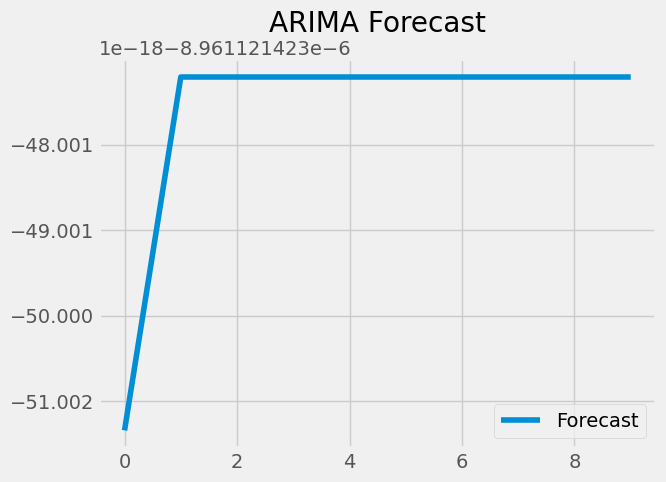

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Step 1: Load and Prepare Data
filepath = 'sample-data/term_dates_parking.csv'
df = pd.read_csv(filepath)

# Rename 'PARKING_LOT_TO_PREDICT' column to your chosen word
chosen_word = 'North'  # Replace 'YourChosenWord' with your desired word
df = df.rename(columns={'PARKING_LOT_TO_PREDICT': chosen_word})

# Extract 'Timestamp' and the renamed column into a new DataFrame
columns_to_keep = ['Timestamp', chosen_word]
df_subset = df[columns_to_keep]

# Split data into training and testing sets
train_data, test_data = train_test_split(df_subset, test_size=0.2, shuffle=False)

# Assuming PCA has been performed or will be performed
train_pca = train_data.drop(columns=['Timestamp'])  # Adjust according to your data
test_pca = test_data.drop(columns=['Timestamp'])  # Adjust according to your data
data_pca = df_subset.drop(columns=['Timestamp'])

# Display shapes to verify split
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Step 2: Define timestamp function (similar to provided function)
def timestamp(x, data2, a='day', b='hour'):
    x['Timestamp'] = pd.to_datetime(x['Timestamp'])
    x[a] = x['Timestamp'].dt.dayofweek
    x[b] = x['Timestamp'].dt.hour
    
    def times(c):
        if c in [1,2,3]:
            return 'DawnA'
        elif c in [4,5,6]:
            return 'DawnB'
        elif c in [7,8,9]:
            return 'MorningA'
        elif c in [10,11,12]:
            return 'MorningB'
        elif c in [13,14,15]:
            return 'AfternoonA'
        elif c in [16,17,18]:
            return 'AfternoonB'
        elif c in [19,20,21]:
            return 'EveningA'
        else:
            return 'EveningB'
    
    x['TimeSlot'] = x[b].apply(times)
    
    for i in [a, b, 'TimeSlot']:
        globals()['dummy_'+str(i)] = pd.get_dummies(x[i])
        if i == a:
            globals()['dummy_'+str(i)].columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        elif i == b:
            globals()['dummy_'+str(i)].columns = [str(x)+'Hour' for x in range(24)]
        data2 = pd.concat([data2, globals()['dummy_'+str(i)]], axis=1)
    
    data2 = data2.dropna()
    return data2

# Step 3: Apply timestamp function to your datasets
train_data2 = timestamp(train_data, train_pca, 'day', 'hour')
test_data2 = timestamp(test_data, test_pca, 'day', 'hour')
data2 = timestamp(df_subset, data_pca, 'day', 'hour')  # Assuming df_subset is your processed data

# Step 4: Apply PCA to reduce dimensionality
# Assuming 'Timestamp' column may have been altered or dropped by preprocessing
# Adjust based on actual column names in data2 after preprocessing
pca = PCA(n_components=3)
pca.fit(data2.drop(columns=[chosen_word]))  # Adjust columns based on actual structure
transformed_data = pca.transform(data2.drop(columns=[chosen_word]))

# Step 5: Fit ARIMA model using transformed data
# Example ARIMA model fitting (adjust as per your data and requirements)
model = SARIMAX(transformed_data[:, 0], order=(1, 1, 1))  # Example ARIMA(1,1,1)
model_fit = model.fit(disp=False)

# Step 6: Predict and visualize results (example)
# Example prediction and plotting (adjust as per your model)
forecast = model_fit.forecast(steps=10)  # Example forecast for 10 steps
plt.plot(forecast, label='Forecast')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()


In [ ]:
data2

,North,Mon,Tue,Wed,Thu,Fri,Sat,Sun,0Hour,1Hour,...,22Hour,23Hour,AfternoonA,AfternoonB,DawnA,DawnB,EveningA,EveningB,MorningA,MorningB
0,951,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,922,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,833,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,851,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,857,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37905,72,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
37906,10,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
37907,0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
37908,1,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


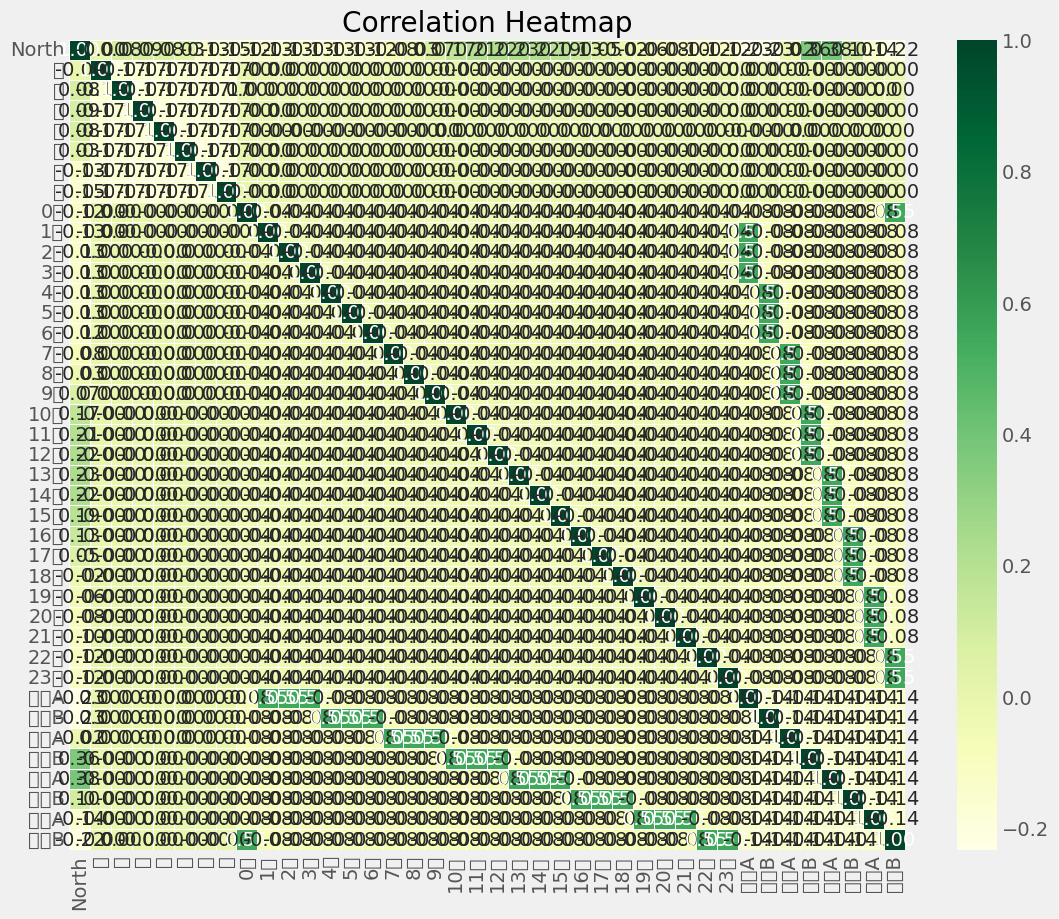

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_data2 is already defined and contains relevant data
# Replace train_data2 with the dataframe you want to visualize
# For example:
# train_data2 = timestamp(train_data, train_pca, 'day', 'hour')

# Create heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(train_data2.corr(), cmap='YlGn', annot=True, fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
